# Gated Recurrent Unit

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [33]:
tf.random.set_seed(1234)


In [34]:
data = pd.read_csv("On-street_Parking_Bay_Sensors (2).csv")

In [35]:
data

,bay_id,st_marker_id,status,location,lat,lon
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724
...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514


In [36]:
y = pd.get_dummies(data.status, prefix='status')


In [37]:
y

,status_Present,status_Unoccupied
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
948,0,1
949,0,1
950,0,1
951,0,1


In [38]:
data_data = pd.concat([data, y], axis=1, join='inner')
display(data_data)

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0,1
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0,1
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0,1
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0,1
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0,1
...,...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0,1
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0,1
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0,1
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0,1


In [39]:
data_data.drop(columns=['status_Unoccupied'], axis = 1, inplace = True)

In [40]:
data_data

,bay_id,st_marker_id,status,location,lat,lon,status_Present
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


In [41]:
data_data.drop(columns=['status'], axis = 1, inplace = True)

In [42]:
data_data = data_data.rename(columns={'status_Present': 'status'})

In [43]:
data_data

,bay_id,st_marker_id,location,lat,lon,status
0,1399,1581S,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...
948,2643,10117W,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


In [44]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Occupied or Not ($m³$/capita.day)', 
                                  {'fontsize': 12})

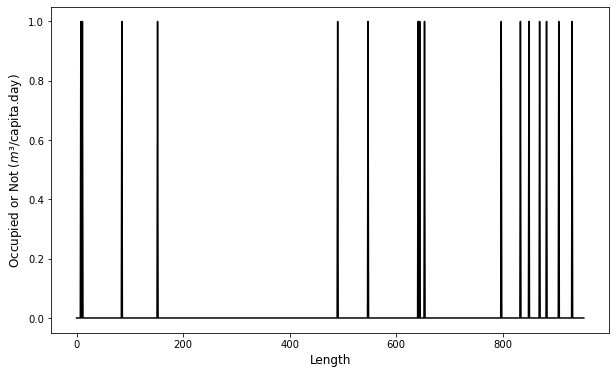

In [45]:
dataset = data_data.copy()
timeseries(data_data.index, dataset['status'], 'Length')

In [46]:
df = data_data.copy()

In [47]:
# Check for missing values
print('Total num of missing values:') 
print(df.status.isna().sum())
print('')


Total num of missing values:
0



In [48]:
df

,bay_id,st_marker_id,location,lat,lon,status
0,1399,1581S,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...
948,2643,10117W,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


In [49]:
# Keep WC and drop Date
df = df.drop(['bay_id', 'lat', 'lon', 'st_marker_id', 'location'], axis = 1)

In [50]:
df

,status
0,0
1,0
2,0
3,0
4,0
...,...
948,0
949,0
950,0
951,0


In [51]:
df

,status
0,0
1,0
2,0
3,0
4,0
...,...
948,0
949,0
950,0
951,0


In [52]:
# Split train data and test data
train_size = int(len(df)*0.7)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [53]:
train_data.shape

(667, 1)

In [54]:
test_data.shape

(286, 1)

In [55]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)


In [56]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 30
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape) 
print('y_test.shape:', y_test.shape)

X_train.shape: (637, 30, 1)
y_train.shape: (637, 1)
X_test.shape: (256, 30, 1)
y_test.shape: (256, 1)


In [57]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam' ,loss='mse')
    return model
model_gru = create_gru(64)

In [58]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
32/32 [==============================] - 5s 61ms/step - loss: 0.0060 - val_loss: 0.0307
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0060 - val_loss: 0.0306
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0060 - val_loss: 0.0304
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0060 - val_loss: 0.0308
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0059 - val_loss: 0.0306
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.0060 - val_loss: 0.0306
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0061 - val_loss: 0.0305
Epoch 8/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0059 - val_loss: 0.0305
Epoch 9/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0060 - val_loss: 0.0306
Epoch 10/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0059 - val_loss: 0.0306

In [59]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)


In [29]:
y_test

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

In [66]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 


In [61]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

In [62]:
prediction_gru[prediction_gru < 0.5] = 0

In [63]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Squared Error: {:.4f}'.format(mse))    
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, y_test, 'GRU')

GRU:
Mean Squared Error: 0.0273
Mean Absolute Error: 0.0273
Root Mean Square Error: 0.1654



In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, prediction_gru)

0.97265625